In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

#Load data and set output files path
data_dir = Path("../input/mario-kart-8-deluxe-ingame-statistics")
data_dir_output = Path("./")
df_bodies = pd.read_csv(data_dir / "bodies_karts.csv",delimiter=";")
df_drivers = pd.read_csv(data_dir / "drivers.csv",delimiter=";")
df_gliders = pd.read_csv(data_dir / "gliders.csv",delimiter=";")
df_tires = pd.read_csv(data_dir / "tires.csv",delimiter=";")

output_best = "best_combination.csv"
output_combined = "kart_combination.csv"
output_groups = "groups.csv"

### Have a look at the data

In [2]:
df_bodies.head()

,Body,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Standard Kart,2,4,3,3,4,3,3,3,3,3,2,3,3
1,Pipe Frame,1,6,3,4,6,1,3,1,1,5,4,4,2
2,Mach 8,3,3,2,4,4,3,3,5,4,2,2,4,2
3,Steel Driver,4,1,1,3,2,4,5,2,0,1,5,1,1
4,Cat Cruiser,2,5,4,3,5,2,2,3,4,4,2,3,4


In [3]:
df_drivers.head()

,Driver,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Mario,6,2,4,2,2,6,6,6,6,4,4,4,4
1,Luigi,6,2,5,1,2,6,6,6,6,5,5,5,5
2,Peach,4,3,3,3,3,5,5,5,5,5,5,5,5
3,Daisy,4,3,3,3,3,5,5,5,5,5,5,5,5
4,Yoshi,4,3,3,3,3,5,5,5,5,5,5,5,5


In [4]:
df_gliders.head()

,Glider,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Super Glider,1,1,1,1,1,1,1,0,2,1,0,1,1
1,Cloud Glider,0,2,1,1,2,0,1,1,1,1,0,1,2
2,Wario Wing,2,1,2,0,1,1,0,1,2,1,1,0,1
3,Waddle Wing,1,1,1,1,1,1,1,0,2,1,0,1,1
4,Peach Parasol,1,2,2,0,2,0,0,1,1,1,1,0,2


In [5]:
df_tires.head()

,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Standard,2,4,2,5,3,2,3,2,3,3,3,3,3
1,Monster,4,2,3,7,2,2,2,2,1,0,1,0,1
2,Roller,0,6,0,4,6,0,3,0,3,4,4,4,4
3,Slim,2,2,4,1,2,3,2,4,2,4,4,3,4
4,Slick,3,1,4,0,0,4,0,4,0,2,0,2,1


In [6]:
df_bodies.shape

(40, 14)

In [7]:
df_drivers.shape

(43, 14)

In [8]:
df_gliders.shape

(14, 14)

In [9]:
df_tires.shape

(21, 14)

### Group the attributes

In [10]:
features = ['Weight','Acceleration','On-Road traction','Off-Road Traction','Mini-Turbo',
            'Ground Speed','Water Speed','Anti-Gravity Speed','Air Speed','Ground Handling',
            'Water Handling','Anti-Gravity Handling','Air Handling'
           ]

#Grip = On-Road traction + Off-Road Traction 
#Speed = Ground Speed + Water Speed + Anti-Gravity Speed + Air Speed
#Handling = Ground Handling + Water Handling + Anti-Gravity Handling + Air Handling

grouped_features = ['Total Grip','Total Speed','Total Handling']
grouped_features_avg = ['Avg Grip','Avg Speed','Avg Handling']
unique_features = ['Weight', 'Acceleration','Mini-Turbo']

In [11]:
df_bodies = df_bodies.sort_values(by=features, ignore_index=True)


### Group parts with the same attirbutes and give them a name

In [12]:
df_groups = pd.DataFrame()
df_groups['Name'] = df_bodies['Body']
df_groups["Part"] = "Body" 
grouped_bodies = ['Falcon-Buggy','Falcon-Buggy',
                       'Landship-Streetle','Landship-Streetle',
                       'Buggy-Scooty','Buggy-Scooty',
                       'Prancer-Bikes','Prancer-Bikes','Prancer-Bikes',
                       'Bike-Flame-Wiggler-Arrow','Bike-Flame-Wiggler-Arrow',
                       'Bike-Flame-Wiggler-Arrow','Bike-Flame-Wiggler-Arrow',
                       'Frame-Varmint-Tripper','Frame-Varmint-Tripper',
                       'Frame-Varmint-Tripper','Sneeker-Gold-Master',
                       'Sneeker-Gold-Master', 'Sneeker-Gold-Master',
                       'Standard-Duke-Roadster','Standard-Duke-Roadster',
                       'Standard-Duke-Roadster','Cat-Comet-Yoshi-Teddy',
                       'Cat-Comet-Yoshi-Teddy', 'Cat-Comet-Yoshi-Teddy',
                       'Cat-Comet-Yoshi-Teddy','Circuit-Dasher-Wing',
                       'Circuit-Dasher-Wing','Circuit-Dasher-Wing',
                       'Tanooki-Koopa','Tanooki-Koopa',
                       'March-Coupe-Inkstriker','Mach-Coupe-Inkstriker',
                       'March-Coupe-Inkstriker','Badwagon-ATV-GLA','Badwagon-ATV-GLA',
                       'Badwagon-ATV-GLA','Steel-Tri-Bone','Steel-Tri-Bone',
                       'Steel-Tri-Bone'
]
df_groups['Group'] = grouped_bodies
df_groups


,Name,Part,Group
0,Blue Falcon,Body,Falcon-Buggy
1,Splat Buggy,Body,Falcon-Buggy
2,Landship,Body,Landship-Streetle
3,Streetle,Body,Landship-Streetle
4,Biddybuggy,Body,Buggy-Scooty
5,Mr. Scooty,Body,Buggy-Scooty
6,Prancer,Body,Prancer-Bikes
7,Sport Bike,Body,Prancer-Bikes
8,Jet Bike,Body,Prancer-Bikes
9,Standard Bike,Body,Bike-Flame-Wiggler-Arrow


In [13]:
bodies = df_bodies.copy()
bodies.drop_duplicates(features,inplace=True)
unique_bodies = bodies.sort_values(features)
bodies = unique_bodies.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Body"].drop_duplicates("Group")).reset_index(drop=True)
bodies['Body'] = unique_grouped['Group']
bodies

,Body,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Falcon-Buggy,0,3,1,3,3,4,2,4,3,2,3,5,1
1,Landship-Streetle,0,6,0,6,6,1,5,0,2,4,5,2,3
2,Buggy-Scooty,0,7,1,4,7,0,1,2,1,5,4,5,4
3,Prancer-Bikes,1,2,1,2,3,4,3,3,3,3,3,2,3
4,Bike-Flame-Wiggler-Arrow,1,5,3,5,5,2,2,4,3,4,3,4,3
5,Frame-Varmint-Tripper,1,6,3,4,6,1,3,1,1,5,4,4,2
6,Sneeker-Gold-Master,2,2,1,0,3,4,2,3,3,3,2,3,2
7,Standard-Duke-Roadster,2,4,3,3,4,3,3,3,3,3,2,3,3
8,Cat-Comet-Yoshi-Teddy,2,5,4,3,5,2,2,3,4,4,2,3,4
9,Circuit-Dasher-Wing,3,1,3,1,1,5,1,4,2,1,1,2,0


In [14]:
df_drivers = df_drivers.sort_values(features)

In [15]:
df_tmp = pd.DataFrame()
df_tmp['Name'] = df_drivers['Driver']
df_tmp["Part"] = "Driver" 
grouped_drivers = ['BabyPrincesses', 'BabyPrincesses', 
                   'BabyRosa-Lemmy', 'BabyRosa-Lemmy', 
                   'BabyMario-Luigi-Bones','BabyMario-Luigi-Bones','BabyMario-Luigi-Bones',
                  'Koopa-Lakitu-Bowser', 'Koopa-Lakitu-Bowser', 'Koopa-Lakitu-Bowser', 
                   'Toadette-Wendy-Isabelle','Toadette-Wendy-Isabelle','Toadette-Wendy-Isabelle',
                  'CatPeach-VillagerF-InklingG', 'CatPeach-VillagerF-InklingG', 'CatPeach-VillagerF-InklingG', 
                   'Toad-Shy-Larry','Toad-Shy-Larry','Toad-Shy-Larry',
                  'Peach-Daisy-Yoshi','Peach-Daisy-Yoshi','Peach-Daisy-Yoshi',
                   'Tanooki-VillagerM-InklingB','Tanooki-VillagerM-InklingB','Tanooki-VillagerM-InklingB',
                  'Mario-Ludwig-MiiM','Mario-Ludwig-MiiM', 'Mario-Ludwig-MiiM',  
                   'Luigi-Iggy', 'Luigi-Iggy', 
                   'Rosa-Link-Boo','Rosa-Link-Boo','Rosa-Link-Boo',
                  'Donkey-Waluigi-Roy','Donkey-Waluigi-Roy', 'Donkey-Waluigi-Roy',  
                   'Wario-DryBowser', 'Wario-DryBowser', 
                   'Boswer-Morton','Boswer-Morton',
                  'Metal-Golds', 'Metal-Golds','Metal-Golds'
                  ]
df_tmp['Group'] = grouped_drivers
df_groups = df_groups.append(df_tmp)


In [16]:
drivers = df_drivers.copy()
drivers.drop_duplicates(features,inplace=True)
unique_drivers = drivers.sort_values(features)
drivers = unique_drivers.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Driver"].drop_duplicates("Group")).reset_index(drop=True)
drivers['Driver'] = unique_grouped['Group']
drivers

,Driver,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,BabyPrincesses,0,4,3,5,5,0,0,0,0,10,10,10,10
1,BabyRosa-Lemmy,0,5,4,3,5,0,0,0,0,9,9,9,9
2,BabyMario-Luigi-Bones,1,5,2,4,4,1,1,1,1,8,8,8,8
3,Koopa-Lakitu-Bowser,2,4,1,5,4,2,2,2,2,8,8,8,8
4,Toadette-Wendy-Isabelle,2,5,4,2,4,2,2,2,2,7,7,7,7
5,CatPeach-VillagerF-InklingG,3,4,2,3,3,4,4,4,4,6,6,6,6
6,Toad-Shy-Larry,3,4,3,4,3,3,3,3,3,7,7,7,7
7,Peach-Daisy-Yoshi,4,3,3,3,3,5,5,5,5,5,5,5,5
8,Tanooki-VillagerM-InklingB,5,3,7,1,3,5,5,5,5,5,5,5,5
9,Mario-Ludwig-MiiM,6,2,4,2,2,6,6,6,6,4,4,4,4


In [17]:
df_gliders = df_gliders.sort_values(features)

In [18]:
df_tmp = pd.DataFrame()
df_tmp['Name'] = df_gliders['Glider']
df_tmp["Part"] = "Glider" 
grouped_gliders = ['Cloud-Parachute-Flower-Paper', 'Cloud-Parachute-Flower-Paper', 
                   'Cloud-Parachute-Flower-Paper', 'Cloud-Parachute-Flower-Paper', 
                   'Super-Waddle-Hylian','Super-Waddle-Hylian','Super-Waddle-Hylian',
                   'Peach-Parafoil-Bowser-MKTV', 'Peach-Parafoil-Bowser-MKTV', 
                   'Peach-Parafoil-Bowser-MKTV', 'Peach-Parafoil-Bowser-MKTV', 
                   'Wario-Plane-Gold','Wario-Plane-Gold','Wario-Plane-Gold'
                  ]
df_tmp['Group'] = grouped_gliders
df_groups = df_groups.append(df_tmp)

In [19]:
gliders = df_gliders.copy()
gliders.drop_duplicates(features,inplace=True)
unique_gliders = gliders.sort_values(features)
gliders = unique_gliders.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Glider"].drop_duplicates("Group")).reset_index(drop=True)
gliders['Glider'] = unique_grouped['Group']
gliders

,Glider,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Cloud-Parachute-Flower-Paper,0,2,1,1,2,0,1,1,1,1,0,1,2
1,Super-Waddle-Hylian,1,1,1,1,1,1,1,0,2,1,0,1,1
2,Peach-Parafoil-Bowser-MKTV,1,2,2,0,2,0,0,1,1,1,1,0,2
3,Wario-Plane-Gold,2,1,2,0,1,1,0,1,2,1,1,0,1


In [20]:
df_tires = df_tires.sort_values(features)

In [21]:
df_tmp = pd.DataFrame()
df_tmp['Name'] = df_tires['Tire']
df_tmp["Part"] = "Tire" 
grouped_tires = ['Button-Leaf','Button-Leaf',  
                 'Roller-Azure', 'Roller-Azure', 
                 'Sponge-Cushion', 'Sponge-Cushion', 
                 'Slim-Wood-Crimson','Slim-Wood-Crimson','Slim-Wood-Crimson',
                 'Standards-GLA', 'Standards-GLA', 'Standards-GLA', 
                 'Slicks', 'Slicks',
                 'OffRoads-Triforce', 'OffRoads-Triforce', 'OffRoads-Triforce',
                 'Metal-Gold', 'Metal-Gold', 
                 'Monsters', 'Monsters']
df_tmp['Group'] = grouped_tires
df_groups = df_groups.append(df_tmp)

In [22]:
tires = df_tires.copy()
tires.drop_duplicates(features,inplace=True)
unique_tires = tires.sort_values(features)
tires = unique_tires.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Tire"].drop_duplicates("Group")).reset_index(drop=True)
tires['Tire'] = unique_grouped['Group']
tires

,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Button-Leaf,0,5,1,3,5,1,2,2,2,3,3,4,2
1,Roller-Azure,0,6,0,4,6,0,3,0,3,4,4,4,4
2,Sponge-Cushion,1,4,2,6,4,1,1,1,4,2,1,2,3
3,Slim-Wood-Crimson,2,2,4,1,2,3,2,4,2,4,4,3,4
4,Standards-GLA,2,4,2,5,3,2,3,2,3,3,3,3,3
5,Slicks,3,1,4,0,0,4,0,4,0,2,0,2,1
6,OffRoads-Triforce,3,3,3,6,1,3,4,2,1,1,1,2,2
7,Metal-Gold,4,0,1,2,0,4,3,1,2,2,2,1,0
8,Monsters,4,2,3,7,2,2,2,2,1,0,1,0,1


### Calculate the sum of different attirbutes for each driver + body + glider + tire combinations

In [23]:
parts = ['Driver','Body','Glider','Tire']
df_combined = pd.DataFrame(columns = parts + features)
df_combined[grouped_features] = 0
df_combined[['Overall', 'Near Avg Cnt']]  = 0

i = 0
for index, driver in drivers.iterrows():
    driver_name = driver['Driver']   
    for index2, body in bodies.iterrows():
        body_name = body['Body']
        for index3, glider in gliders.iterrows():
            glider_name = glider['Glider']
            for index4, tire in tires.iterrows():   
                tire_name = tire['Tire']
                df_combined.loc[i, parts]= [driver_name, body_name, glider_name, tire_name]
                df_combined.loc[i, features] = driver[features]+body[features]+glider[features]+tire[features]
                df_combined.loc[i, 'Overall'] = driver[features].sum()+body[features].sum()+glider[features].sum()+tire[features].sum()
                df_combined.loc[i, 'Near Avg Cnt'] = 0
                i = i+1
                
df_combined['Total Grip'] = df_combined['On-Road traction'] + df_combined['Off-Road Traction']
df_combined['Total Speed'] = df_combined['Ground Speed'] + df_combined['Water Speed'] + df_combined['Anti-Gravity Speed'] + df_combined['Air Speed']
df_combined['Total Handling'] = df_combined['Ground Handling'] + df_combined['Water Handling']  + df_combined['Anti-Gravity Handling'] + df_combined['Air Handling'] 
df_combined['Avg Grip'] = df_combined['Total Grip'] / 3
df_combined['Avg Speed'] = df_combined['Total Speed'] / 4
df_combined['Avg Handling'] = df_combined['Total Handling'] / 4
df_combined.tail()


,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Anti-Gravity Handling,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Near Avg Cnt,Avg Grip,Avg Speed,Avg Handling
8059,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Standards-GLA,18,7,13,9,7,15,...,7,8,22,57,35,146.0,0.0,7.333333,14.25,8.75
8060,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Slicks,19,4,15,4,4,17,...,6,6,19,55,28,129.0,0.0,6.333333,13.75,7.0
8061,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,OffRoads-Triforce,19,6,14,10,5,16,...,6,7,24,57,29,140.0,0.0,8.0,14.25,7.25
8062,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Metal-Gold,20,3,12,6,4,17,...,5,5,18,57,28,130.0,0.0,6.0,14.25,7.0
8063,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Monsters,20,5,14,11,6,15,...,4,6,25,54,25,135.0,0.0,8.333333,13.5,6.25


### Get a list of combinations with the best overall scores

In [24]:
df_best = pd.DataFrame()
df_best_tmp = df_combined[df_combined['Overall']==df_combined['Overall'].max()]
df_best_tmp['Feature'] = "Overall"
df_best = df_best.append(df_best_tmp)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
for feature in features:
    df_best_tmp = df_combined[df_combined[feature]==df_combined[feature].max()]
    df_best_tmp['Feature'] = feature
    df_best = df_best.append(df_best_tmp)

for feature in grouped_features:
    df_best_tmp = df_combined[df_combined[feature]==df_combined[feature].max()]
    df_best_tmp['Feature'] = feature
    df_best = df_best.append(df_best_tmp)
    
df_best

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Near Avg Cnt,Avg Grip,Avg Speed,Avg Handling,Feature
7921,Metal-Golds,Tanooki-Koopa,Cloud-Parachute-Flower-Paper,Roller-Azure,13,11,13,13,12,10,...,12,26,53,46,161.0,0.0,8.666667,13.25,11.5,Overall
7924,Metal-Golds,Tanooki-Koopa,Cloud-Parachute-Flower-Paper,Standards-GLA,15,9,15,14,9,12,...,11,29,57,42,161.0,0.0,9.666667,14.25,10.5,Overall
7939,Metal-Golds,Tanooki-Koopa,Peach-Parafoil-Bowser-MKTV,Roller-Azure,14,11,14,12,12,10,...,12,26,52,46,161.0,0.0,8.666667,13.0,11.5,Overall
7942,Metal-Golds,Tanooki-Koopa,Peach-Parafoil-Bowser-MKTV,Standards-GLA,16,9,16,13,9,12,...,11,29,56,42,161.0,0.0,9.666667,14.0,10.5,Overall
7948,Metal-Golds,Tanooki-Koopa,Wario-Plane-Gold,Roller-Azure,15,10,14,12,11,11,...,11,26,54,45,161.0,0.0,8.666667,13.5,11.25,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,Wario-DryBowser,March-Coupe-Inkstriker,Wario-Plane-Gold,Slim-Wood-Crimson,16,6,13,6,7,17,...,8,19,70,32,150.0,0.0,6.333333,17.5,8.0,Total Speed
7464,Boswer-Morton,March-Coupe-Inkstriker,Super-Waddle-Hylian,Slim-Wood-Crimson,16,6,13,6,7,17,...,7,19,70,28,146.0,0.0,6.333333,17.5,7.0,Total Speed
7482,Boswer-Morton,March-Coupe-Inkstriker,Wario-Plane-Gold,Slim-Wood-Crimson,17,6,14,5,7,17,...,7,19,70,28,147.0,0.0,6.333333,17.5,7.0,Total Speed
73,BabyPrincesses,Buggy-Scooty,Cloud-Parachute-Flower-Paper,Roller-Azure,0,19,5,14,20,0,...,20,19,13,78,149.0,0.0,6.333333,3.25,19.5,Total Handling


### Output the calculations to csv files

In [26]:
df_best.to_csv(data_dir_output / output_best)
df_combined.to_csv(data_dir_output / output_combined)
df_groups.to_csv(data_dir_output / output_groups)

### Plot graphs to see relationships between attributes

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


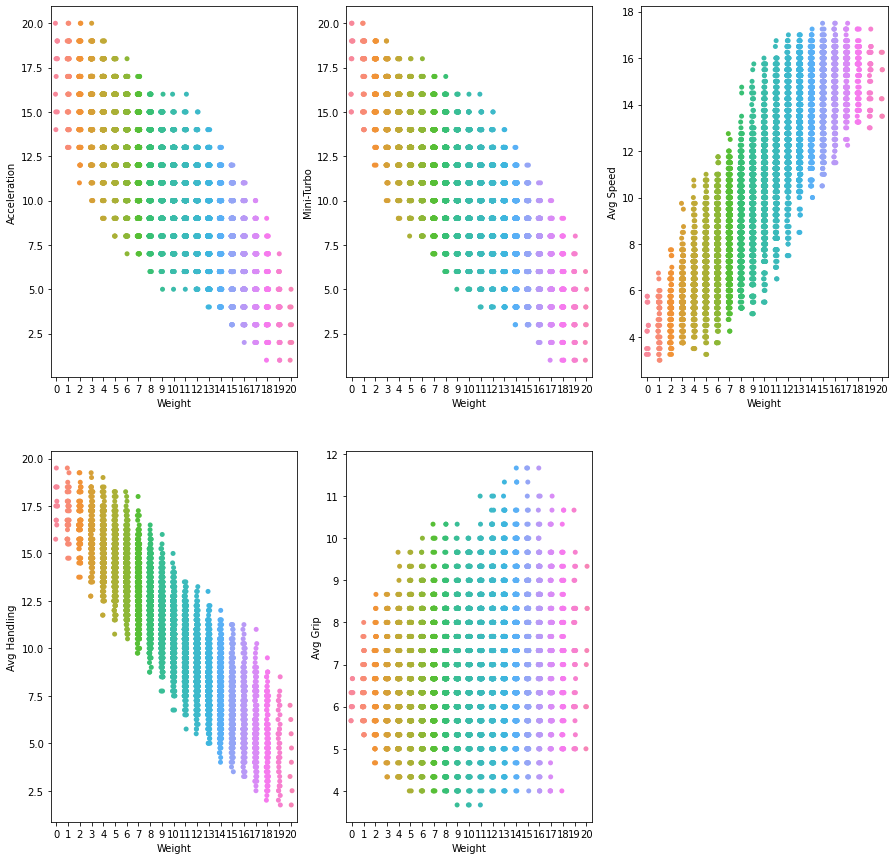

In [28]:
plot_features = ['Acceleration', 'Mini-Turbo', 'Avg Speed', 
              'Avg Handling', 'Avg Grip']
plt.figure(figsize=(15,15))
for i, col in enumerate(plot_features):
    ax = plt.subplot(2, 3, i+1)
    sns.stripplot(data=df_combined, x='Weight', y=col, ax=ax)

1. Grip is independent of other attributes
2. Acceleration, Mini-Turbo and Handling decrease with the increase of Weight, where Speed increases with it.

### Plot Radar Chart of Combinations with the Best Overall Score

In [29]:
import plotly.express as px

best_overall_karts = df_best[df_best['Feature'] == "Overall"]
theta_col = grouped_features_avg + unique_features

for index, kart in best_overall_karts.iterrows():
    r_values = kart[theta_col].values.tolist()
    df = pd.DataFrame(dict(r = r_values, theta = theta_col))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True, 
                        title=kart['Driver']+"/"+kart['Body']+"/"+kart['Glider']+"/"+kart['Tire'])
    fig.update_traces(fill='toself')
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 18]
        )),
      showlegend=False
    )
    fig.show()